<a href="https://colab.research.google.com/github/Khiem472/TTNT/blob/master/image_classifying.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt



In [ ]:
train_set = torchvision.datasets.CIFAR10('./root', True, transform=transforms.ToTensor(), download=True)
train_loader = torch.utils.data.DataLoader(train_set, batch_size=5, shuffle=True)

Files already downloaded and verified


In [ ]:
test_set = torchvision.datasets.CIFAR10(root='./root', train=False, transform=transforms.ToTensor(), download=False)
test_loader = torch.utils.data.DataLoader(dataset=test_set, batch_size=5, shuffle=False)

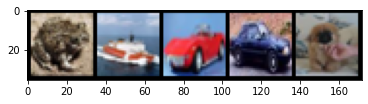

frog ship car car dog


In [ ]:
def show_image(img):
  img = torchvision.utils.make_grid(img, nrow=5)
  img = img.numpy()
  img = np.transpose(img, (1, 2,0))
  plt.imshow(img)
  plt.show()

examples = iter(train_loader)
images, labels = examples.next()
show_image(images)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
print(' '.join(classes[labels[i]] for i in range(5)))


In [ ]:
import torch.nn as nn
import torch.nn.functional as f

class NeuralNetwork(nn.Module):
  def __init__(self):
    super(NeuralNetwork, self).__init__()
    self.conv1 = nn.Conv2d(3, 6, 5)
    self.conv2 = nn.Conv2d(6, 16, 5)
    self.pool = nn.MaxPool2d(2)
    self.fc1 = nn.Linear(16*5*5, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)
  
  def forward(self, x):
    x = self.pool(f.relu(self.conv1(x)))
    x = self.pool(f.relu(self.conv2(x)))
    x = x.view(-1, 16*5*5)
    x = f.relu(self.fc1(x))
    x = f.relu(self.fc2(x))
    x = self.fc3(x)
    return x

nrNet = NeuralNetwork()
print(nrNet)

NeuralNetwork(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [ ]:
import torch.optim as otm

In [ ]:
loss_func = nn.CrossEntropyLoss()
optimizer = otm.SGD(nrNet.parameters(), lr = 0.01)

for epoch in range(5):
  for i, (images, labels) in enumerate(train_loader):
    optimizer.zero_grad()
    outputs = nrNet(images)
    loss = loss_func(outputs, labels)
    loss.backward()
    optimizer.step()
print('complete')

complete


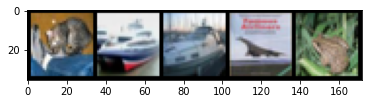

cat ship car ship frog
Accuracy of the network on the 10000 test images: 56 %


In [ ]:
test = iter(test_loader)
images, labels = test.next()

show_image(images)
outputs = nrNet(images)
_, prediction = torch.max(outputs, 1)
print(' '.join(classes[prediction[i]] for i in range(5)))

total = correct = 0
with torch.no_grad():
  for data in test_loader:
    images, labels = data
    outputs = nrNet(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))